In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load

In [ ]:
# Load your new data into a DataFrame
# Assuming your new data is stored in a CSV file named 'new_data.csv'
new_data = pd.read_csv('new_data.csv')

In [ ]:
# One-hot encode categorical variables
new_data_encoded = pd.get_dummies(new_data, columns=['age', 'sex', 'states', 'education level', 'grades', 'employed', 'marital status', 'do you get stressed easily', 'do you have anxiety', 'do you have depression', 'do you have panic attacks', 'do you have suicidal thoughts', 'family history'])

In [ ]:
# Load the trained logistic regression model
model = load('treatment_model.sav')

In [ ]:
# Make predictions on the new data using the trained model
new_data_predictions = model.predict(new_data_encoded)

In [ ]:
# Print or use the predictions as needed
print(new_data_predictions)

[0 0 0 ... 0 0 1]


In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of students who seek treatment and those who don't
seek_treatment_percentage = (new_data_predictions.sum() / len(new_data_predictions)) * 100
dont_seek_treatment_percentage = 100 - seek_treatment_percentage

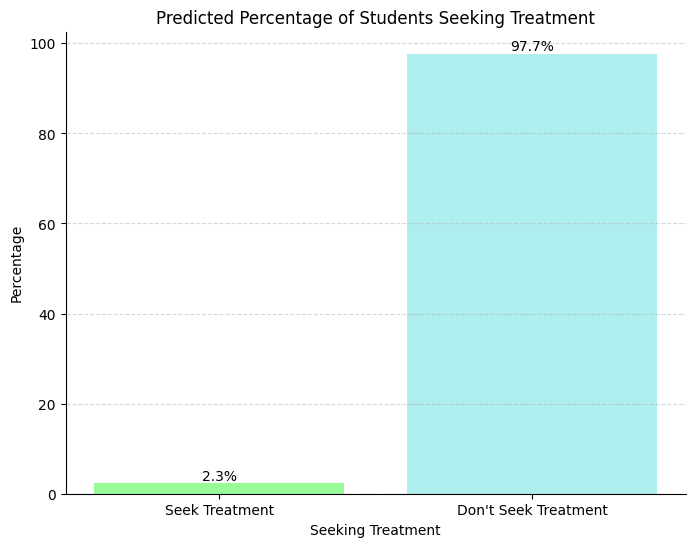

In [ ]:
# Define the categories and percentages
categories = ['Seek Treatment', "Don't Seek Treatment"]
percentages = [seek_treatment_percentage, dont_seek_treatment_percentage]

# Define pastel colors
colors = ['#98FB98', '#AFEEEE']

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add labels and title
plt.xlabel('Seeking Treatment')
plt.ylabel('Percentage')
plt.title('Predicted Percentage of Students Seeking Treatment')

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()